In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE,SequentialFeatureSelector
from tqdm import tqdm
from imblearn.pipeline import Pipeline

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
rs = 0

In [2]:
processed_train_data = pd.read_csv("Processed_train_data.csv")
processed_test_data = pd.read_csv("Processed_test_data.csv")

In [3]:
processed_train_data.head()

,duration,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service,flag,src_bytes,dst_bytes,land,wrong_fragment,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,class
0,0.0,0.0,1.0,0.0,0.273363,0.145284,0.009003,0.000000,0.0,0.0,...,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0
1,0.0,0.0,0.0,1.0,0.389904,0.145284,0.002677,0.000000,0.0,0.0,...,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0
2,0.0,0.0,1.0,0.0,0.953923,0.989729,0.000000,0.000000,0.0,0.0,...,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1
3,0.0,0.0,1.0,0.0,0.056722,0.145284,0.004254,0.329867,0.0,0.0,...,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.01,0
4,0.0,0.0,1.0,0.0,0.056722,0.145284,0.003649,0.016993,0.0,0.0,...,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0


In [4]:
processed_train_data_corr = processed_train_data.corr()
processed_train_data_corr

,duration,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service,flag,src_bytes,dst_bytes,land,wrong_fragment,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,class
duration,1.000000,-0.026685,-0.126197,0.172033,-0.024875,-0.027455,-0.010595,-0.000948,-0.001415,-0.008989,...,0.032963,-0.035889,0.042144,-0.098637,-0.103101,0.271852,0.221037,-0.027987,-0.060246,-0.057015
protocol_type_icmp,-0.026685,1.000000,-0.559197,-0.099729,0.233540,-0.218635,-0.023752,-0.101339,-0.003845,0.000604,...,-0.019567,0.340639,-0.195707,-0.010787,0.156807,-0.088215,0.576785,0.483155,-0.171064,0.200445
protocol_type_tcp,-0.126197,-0.559197,1.000000,-0.769134,-0.010839,0.390981,0.059445,0.173631,0.006876,-0.188367,...,0.011799,-0.174979,-0.010342,-0.106302,-0.207503,-0.027979,-0.493802,-0.225143,0.305910,0.055233
protocol_type_udp,0.172033,-0.099729,-0.769134,1.000000,-0.167023,-0.300716,-0.053036,-0.130272,-0.005289,0.225613,...,0.000922,-0.052581,0.163280,0.135900,0.128167,0.101584,0.148032,-0.102237,-0.235286,-0.220810
service,-0.024875,0.233540,-0.010839,-0.167023,1.000000,0.693833,-0.123152,-0.335716,0.007357,0.101938,...,0.179723,-0.146869,0.356693,-0.749486,-0.726318,0.225503,0.126824,0.080278,0.611202,0.863797
flag,-0.027455,-0.218635,0.390981,-0.300716,0.693833,1.000000,-0.114055,-0.299261,0.019236,-0.073648,...,0.187326,-0.263952,0.422650,-0.685919,-0.751658,0.177026,-0.259915,-0.152276,0.843170,0.772062
src_bytes,-0.010595,-0.023752,0.059445,-0.053036,-0.123152,-0.114055,1.000000,0.206159,-0.002244,-0.011908,...,-0.037939,0.021774,-0.058692,0.027308,0.099403,-0.044782,-0.011672,-0.034766,-0.097513,0.032445
dst_bytes,-0.000948,-0.101339,0.173631,-0.130272,-0.335716,-0.299261,0.206159,1.000000,-0.005374,-0.034135,...,-0.122054,0.017184,-0.222395,0.371105,0.355464,-0.146216,-0.087215,-0.020915,-0.232907,-0.304654
land,-0.001415,-0.003845,0.006876,-0.005289,0.007357,0.019236,-0.002244,-0.005374,1.000000,-0.001295,...,-0.001647,0.038301,-0.025973,-0.014425,0.011687,-0.004414,0.035352,0.070849,0.012123,0.007136
wrong_fragment,-0.008989,0.000604,-0.188367,0.225613,0.101938,-0.073648,-0.011908,-0.034135,-0.001295,1.000000,...,-0.027377,-0.026846,0.041086,-0.046316,-0.049744,0.064102,0.040439,-0.016614,-0.057623,0.096211


In [5]:
processed_train_data_trX = processed_train_data.drop(columns=["class"],axis=1)
processed_train_data_trY = processed_train_data["class"]

In [6]:
processed_test_data_X = processed_test_data.drop(columns=["class"],axis=1)
processed_test_data_Y = processed_test_data["class"]

In [7]:
from imblearn.over_sampling import ADASYN, SMOTE
adasyn = ADASYN(random_state=rs)
smote = SMOTE(random_state=rs)

processed_smote_train_data_trX, processed_smote_train_data_trY = smote.fit_resample(processed_train_data_trX, processed_train_data_trY)

In [8]:
processed_adasyn_train_data_trX, processed_adasyn_train_data_trY = adasyn.fit_resample(processed_train_data_trX, processed_train_data_trY)

In [9]:
processed_smote_train_data = processed_smote_train_data_trX
processed_smote_train_data["class"] = processed_smote_train_data_trY

In [10]:
processed_smote_train_data["class"].value_counts()

0    64928
1    64928
Name: class, dtype: int64

In [11]:
processed_smote_train_data.to_csv("processed_smote_train_data.csv",index=False)

In [12]:
processed_adasyn_train_data = processed_adasyn_train_data_trX
processed_adasyn_train_data["class"] = processed_adasyn_train_data_trY

In [13]:
processed_adasyn_train_data["class"].value_counts()

0    64928
1    64813
Name: class, dtype: int64

In [14]:
processed_train_data["class"].value_counts()

0    64928
1    57709
Name: class, dtype: int64

In [15]:
processed_adasyn_train_data.to_csv("processed_adasyn_train_data.csv",index=False)

In [16]:
processed_smote_train_data_trX = processed_smote_train_data.drop(columns=["class"],axis=1)
processed_smote_train_data_trY = processed_smote_train_data["class"]

processed_adasyn_train_data_trX = processed_adasyn_train_data.drop(columns=["class"],axis=1)
processed_adasyn_train_data_trY = processed_adasyn_train_data["class"]

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix,f1_score,precision_score,recall_score,RocCurveDisplay,PrecisionRecallDisplay

In [18]:
#Function to obtain different metrics based on predicted class labels
def print_metrics(y_test,y_pred,name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("Confusion Matrix Obtained")
    plt.show();
    accuracy_value = round(accuracy_score(y_test,y_pred),4)
    f1_value = round(f1_score(y_test,y_pred,labels=np.unique(y_pred)),4) 
    prec = round(precision_score(y_test,y_pred,labels=np.unique(y_pred)),4)
    rec = round(recall_score(y_test,y_pred,labels=np.unique(y_pred)),4)
    print("Accuarcy value obtained is ",accuracy_value)
    print("F1-score obtained is ",f1_value)
    print("Precision obtained is ",prec)
    print("Recall obtained is ",rec)
    roc_display = RocCurveDisplay.from_predictions(y_test,y_pred,name=name)
    _ = roc_display.ax_.set_title("ROC curve")
    pr_display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name=name)
    _ = pr_display.ax_.set_title("Precision-Recall curve")
    return [accuracy_value,f1_value,prec,rec]

In [19]:
knn_results_table = []

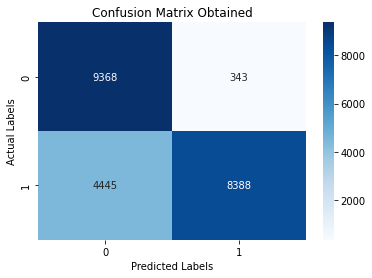

Accuarcy value obtained is  0.7876
F1-score obtained is  0.778
Precision obtained is  0.9607
Recall obtained is  0.6536


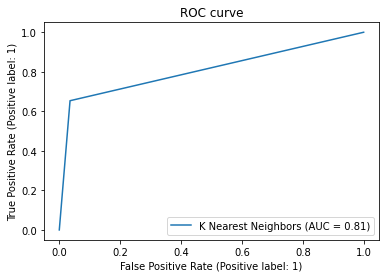

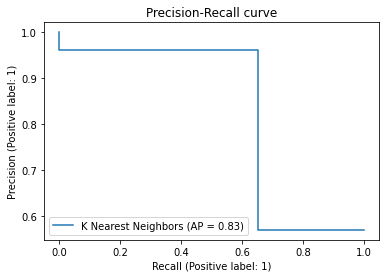

In [20]:
knn = KNeighborsClassifier()
knn.fit(processed_train_data_trX,processed_train_data_trY)
knn_yPred = knn.predict(processed_test_data_X)
#Performance Metrics obtained using KNN
knn_list = ["K Nearest Neighbors"]
knn_list.extend(print_metrics(processed_test_data_Y, knn_yPred,"K Nearest Neighbors"))
knn_results_table.append(knn_list)

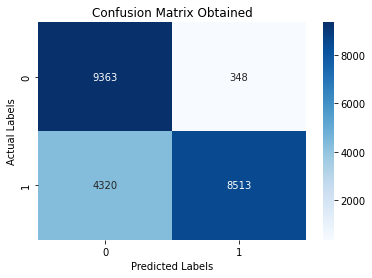

Accuarcy value obtained is  0.7929
F1-score obtained is  0.7848
Precision obtained is  0.9607
Recall obtained is  0.6634


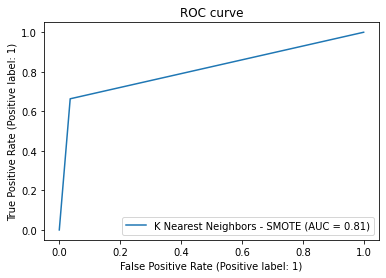

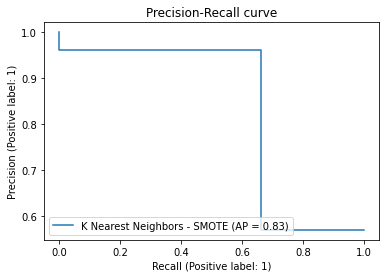

In [21]:
knn_smote = KNeighborsClassifier()
knn_smote.fit(processed_smote_train_data_trX,processed_smote_train_data_trY)
knn_smote_yPred = knn_smote.predict(processed_test_data_X)
#Performance Metrics obtained using KNN
knn_list = ["K Nearest Neighbors - SMOTE"]
knn_list.extend(print_metrics(processed_test_data_Y, knn_smote_yPred,"K Nearest Neighbors - SMOTE"))
knn_results_table.append(knn_list)

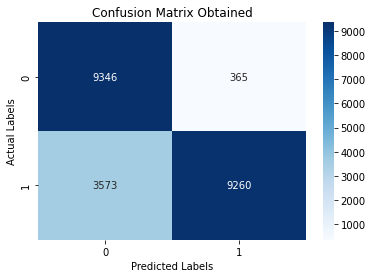

Accuarcy value obtained is  0.8253
F1-score obtained is  0.8247
Precision obtained is  0.9621
Recall obtained is  0.7216


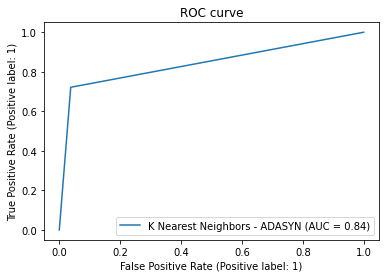

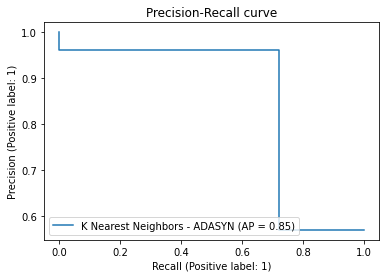

In [22]:
knn_adasyn = KNeighborsClassifier()
knn_adasyn.fit(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY)
knn_adasyn_yPred = knn_adasyn.predict(processed_test_data_X)
#Performance Metrics obtained using KNN
knn_list = ["K Nearest Neighbors - ADASYN"]
knn_list.extend(print_metrics(processed_test_data_Y, knn_adasyn_yPred,"K Nearest Neighbors - ADASYN"))
knn_results_table.append(knn_list)

In [24]:
#Hyperparameter Tuning of K Nearest Neighbor
from sklearn.model_selection import GridSearchCV
rs = 0

knn = KNeighborsClassifier()
params = {
    'n_neighbors': list(range(1, 32, 2))
}
grid_search = GridSearchCV(estimator=knn, 
                           param_grid=params, 
                           cv=5, verbose=10, scoring = "f1")
grid_search.fit(processed_train_data_trX,processed_train_data_trY)
print(grid_search.best_estimator_)
print(grid_search.best_estimator_.get_params())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START n_neighbors=1..............................................
[CV 1/5; 1/16] END ...............n_neighbors=1;, score=0.997 total time=  18.1s
[CV 2/5; 1/16] START n_neighbors=1..............................................
[CV 2/5; 1/16] END ...............n_neighbors=1;, score=0.997 total time=  18.1s
[CV 3/5; 1/16] START n_neighbors=1..............................................
[CV 3/5; 1/16] END ...............n_neighbors=1;, score=0.997 total time=  18.1s
[CV 4/5; 1/16] START n_neighbors=1..............................................
[CV 4/5; 1/16] END ...............n_neighbors=1;, score=0.998 total time=  18.0s
[CV 5/5; 1/16] START n_neighbors=1..............................................
[CV 5/5; 1/16] END ...............n_neighbors=1;, score=0.997 total time=  18.0s
[CV 1/5; 2/16] START n_neighbors=3..............................................
[CV 1/5; 2/16] END ...............n_neighbors=3;

[CV 1/5; 11/16] END .............n_neighbors=21;, score=0.995 total time=  31.2s
[CV 2/5; 11/16] START n_neighbors=21............................................
[CV 2/5; 11/16] END .............n_neighbors=21;, score=0.995 total time=  29.8s
[CV 3/5; 11/16] START n_neighbors=21............................................
[CV 3/5; 11/16] END .............n_neighbors=21;, score=0.995 total time=  29.4s
[CV 4/5; 11/16] START n_neighbors=21............................................
[CV 4/5; 11/16] END .............n_neighbors=21;, score=0.995 total time=  28.4s
[CV 5/5; 11/16] START n_neighbors=21............................................
[CV 5/5; 11/16] END .............n_neighbors=21;, score=0.995 total time=  30.0s
[CV 1/5; 12/16] START n_neighbors=23............................................
[CV 1/5; 12/16] END .............n_neighbors=23;, score=0.994 total time=  31.6s
[CV 2/5; 12/16] START n_neighbors=23............................................
[CV 2/5; 12/16] END ........

In [25]:
#Hyperparameter Tuning of Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
rs = 0

knn = KNeighborsClassifier()
params = {
    'n_neighbors': list(range(1, 32, 2))
}
grid_search = GridSearchCV(estimator=knn, 
                           param_grid=params, 
                           cv=5, verbose=10, scoring = "f1")
grid_search.fit(processed_smote_train_data_trX,processed_smote_train_data_trY)
print(grid_search.best_estimator_)
print(grid_search.best_estimator_.get_params())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START n_neighbors=1..............................................
[CV 1/5; 1/16] END ...............n_neighbors=1;, score=0.998 total time=  21.0s
[CV 2/5; 1/16] START n_neighbors=1..............................................
[CV 2/5; 1/16] END ...............n_neighbors=1;, score=0.997 total time=  20.8s
[CV 3/5; 1/16] START n_neighbors=1..............................................
[CV 3/5; 1/16] END ...............n_neighbors=1;, score=0.997 total time=  20.5s
[CV 4/5; 1/16] START n_neighbors=1..............................................
[CV 4/5; 1/16] END ...............n_neighbors=1;, score=0.998 total time=  21.1s
[CV 5/5; 1/16] START n_neighbors=1..............................................
[CV 5/5; 1/16] END ...............n_neighbors=1;, score=0.998 total time=  20.6s
[CV 1/5; 2/16] START n_neighbors=3..............................................
[CV 1/5; 2/16] END ...............n_neighbors=3;

[CV 1/5; 11/16] END .............n_neighbors=21;, score=0.995 total time=  34.3s
[CV 2/5; 11/16] START n_neighbors=21............................................
[CV 2/5; 11/16] END .............n_neighbors=21;, score=0.995 total time=  32.3s
[CV 3/5; 11/16] START n_neighbors=21............................................
[CV 3/5; 11/16] END .............n_neighbors=21;, score=0.995 total time=  34.8s
[CV 4/5; 11/16] START n_neighbors=21............................................
[CV 4/5; 11/16] END .............n_neighbors=21;, score=0.995 total time=  34.1s
[CV 5/5; 11/16] START n_neighbors=21............................................
[CV 5/5; 11/16] END .............n_neighbors=21;, score=0.996 total time=  34.5s
[CV 1/5; 12/16] START n_neighbors=23............................................
[CV 1/5; 12/16] END .............n_neighbors=23;, score=0.995 total time=  34.3s
[CV 2/5; 12/16] START n_neighbors=23............................................
[CV 2/5; 12/16] END ........

In [26]:
#Hyperparameter Tuning of Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
rs = 0

knn = KNeighborsClassifier()
params = {
    'n_neighbors': list(range(1, 32, 2))
}
grid_search = GridSearchCV(estimator=knn, 
                           param_grid=params, 
                           cv=5, verbose=10, scoring = "f1")
grid_search.fit(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY)
print(grid_search.best_estimator_)
print(grid_search.best_estimator_.get_params())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START n_neighbors=1..............................................
[CV 1/5; 1/16] END ...............n_neighbors=1;, score=0.998 total time=  20.3s
[CV 2/5; 1/16] START n_neighbors=1..............................................
[CV 2/5; 1/16] END ...............n_neighbors=1;, score=0.998 total time=  20.6s
[CV 3/5; 1/16] START n_neighbors=1..............................................
[CV 3/5; 1/16] END ...............n_neighbors=1;, score=0.998 total time=  20.3s
[CV 4/5; 1/16] START n_neighbors=1..............................................
[CV 4/5; 1/16] END ...............n_neighbors=1;, score=0.998 total time=  20.2s
[CV 5/5; 1/16] START n_neighbors=1..............................................
[CV 5/5; 1/16] END ...............n_neighbors=1;, score=0.960 total time=  20.3s
[CV 1/5; 2/16] START n_neighbors=3..............................................
[CV 1/5; 2/16] END ...............n_neighbors=3;

[CV 1/5; 11/16] END .............n_neighbors=21;, score=0.992 total time=  33.6s
[CV 2/5; 11/16] START n_neighbors=21............................................
[CV 2/5; 11/16] END .............n_neighbors=21;, score=0.991 total time=  33.1s
[CV 3/5; 11/16] START n_neighbors=21............................................
[CV 3/5; 11/16] END .............n_neighbors=21;, score=0.991 total time=  34.1s
[CV 4/5; 11/16] START n_neighbors=21............................................
[CV 4/5; 11/16] END .............n_neighbors=21;, score=0.992 total time=  32.3s
[CV 5/5; 11/16] START n_neighbors=21............................................
[CV 5/5; 11/16] END .............n_neighbors=21;, score=0.786 total time=  32.3s
[CV 1/5; 12/16] START n_neighbors=23............................................
[CV 1/5; 12/16] END .............n_neighbors=23;, score=0.992 total time=  33.9s
[CV 2/5; 12/16] START n_neighbors=23............................................
[CV 2/5; 12/16] END ........

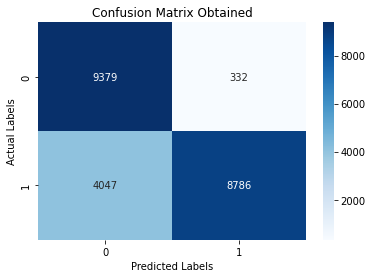

Accuarcy value obtained is  0.8058
F1-score obtained is  0.8005
Precision obtained is  0.9636
Recall obtained is  0.6846


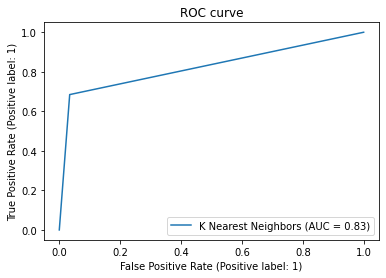

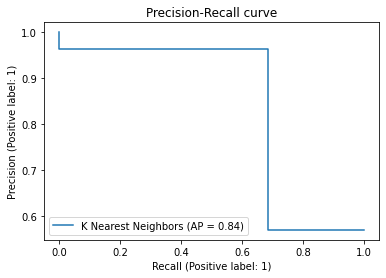

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(processed_train_data_trX,processed_train_data_trY)
knn_yPred = knn.predict(processed_test_data_X)
#Performance Metrics obtained using KNN
knn_list = ["K Nearest Neighbors after Hyperparameter Tuning"]
knn_list.extend(print_metrics(processed_test_data_Y, knn_yPred,"K Nearest Neighbors"))
knn_results_table.append(knn_list)

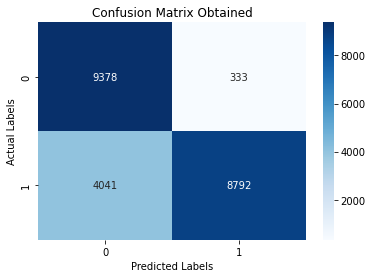

Accuarcy value obtained is  0.806
F1-score obtained is  0.8008
Precision obtained is  0.9635
Recall obtained is  0.6851


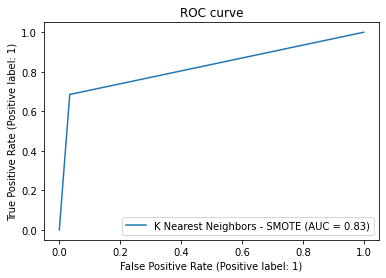

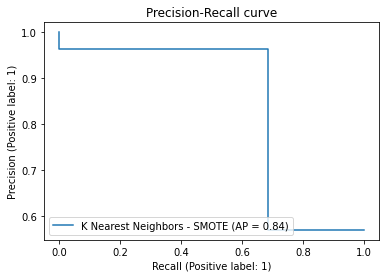

In [31]:
knn_smote = KNeighborsClassifier(n_neighbors=1)
knn_smote.fit(processed_smote_train_data_trX,processed_smote_train_data_trY)
knn_smote_yPred = knn_smote.predict(processed_test_data_X)
#Performance Metrics obtained using KNN
knn_list = ["K Nearest Neighbors - SMOTE after Hyperparameter Tuning"]
knn_list.extend(print_metrics(processed_test_data_Y, knn_smote_yPred,"K Nearest Neighbors - SMOTE"))
knn_results_table.append(knn_list)

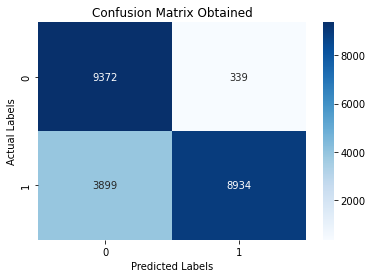

Accuarcy value obtained is  0.812
F1-score obtained is  0.8083
Precision obtained is  0.9634
Recall obtained is  0.6962


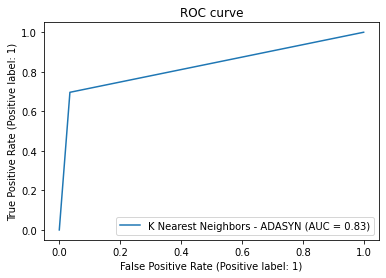

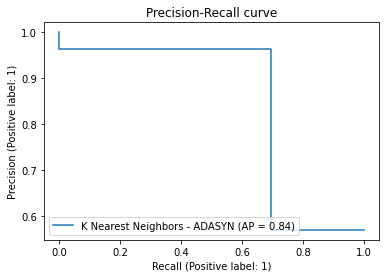

In [32]:
knn_adasyn = KNeighborsClassifier(n_neighbors=1)
knn_adasyn.fit(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY)
knn_adasyn_yPred = knn_adasyn.predict(processed_test_data_X)
#Performance Metrics obtained using KNN
knn_list = ["K Nearest Neighbors - ADASYN after Hyperparameter Tuning"]
knn_list.extend(print_metrics(processed_test_data_Y, knn_adasyn_yPred,"K Nearest Neighbors - ADASYN"))
knn_results_table.append(knn_list)

In [35]:
knn_results_table

[['K Nearest Neighbors', 0.7876, 0.778, 0.9607, 0.6536],
 ['K Nearest Neighbors - SMOTE', 0.7929, 0.7848, 0.9607, 0.6634],
 ['K Nearest Neighbors - ADASYN', 0.8253, 0.8247, 0.9621, 0.7216],
 ['K Nearest Neighbors after Hyperparameter Tuning',
  0.8058,
  0.8005,
  0.9636,
  0.6846],
 ['K Nearest Neighbors - SMOTE after Hyperparameter Tuning',
  0.806,
  0.8008,
  0.9635,
  0.6851],
 ['K Nearest Neighbors - ADASYN after Hyperparameter Tuning',
  0.812,
  0.8083,
  0.9634,
  0.6962]]

In [36]:
#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(knn_results_table,columns = ["Classifier","accuracy","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,Classifier,accuracy,f1-score,Precision,Recall
0,K Nearest Neighbors,0.7876,0.7780,0.9607,0.6536
1,K Nearest Neighbors - SMOTE,0.7929,0.7848,0.9607,0.6634
2,K Nearest Neighbors - ADASYN,0.8253,0.8247,0.9621,0.7216
3,K Nearest Neighbors after Hyperparameter Tuning,0.8058,0.8005,0.9636,0.6846
4,K Nearest Neighbors - SMOTE after Hyperparameter Tuning,0.8060,0.8008,0.9635,0.6851
5,K Nearest Neighbors - ADASYN after Hyperparameter Tuning,0.8120,0.8083,0.9634,0.6962


100%|██████████| 34/34 [48:44<00:00, 86.00s/it] 


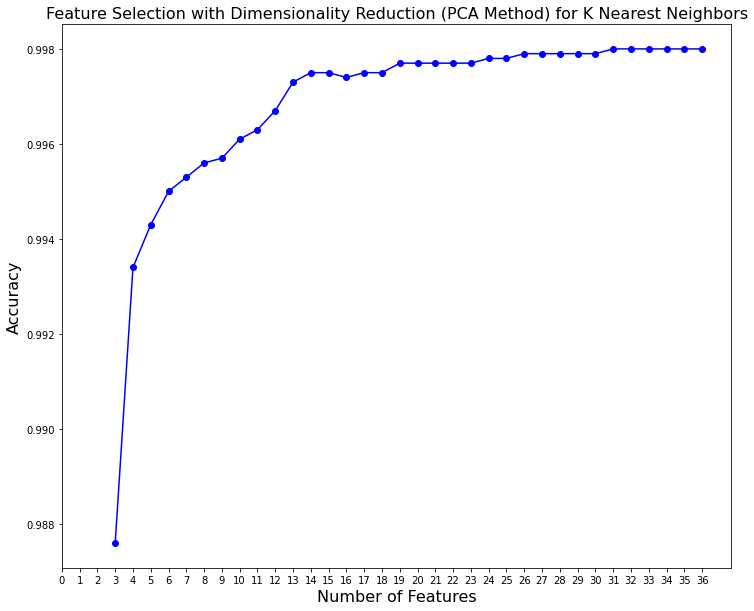

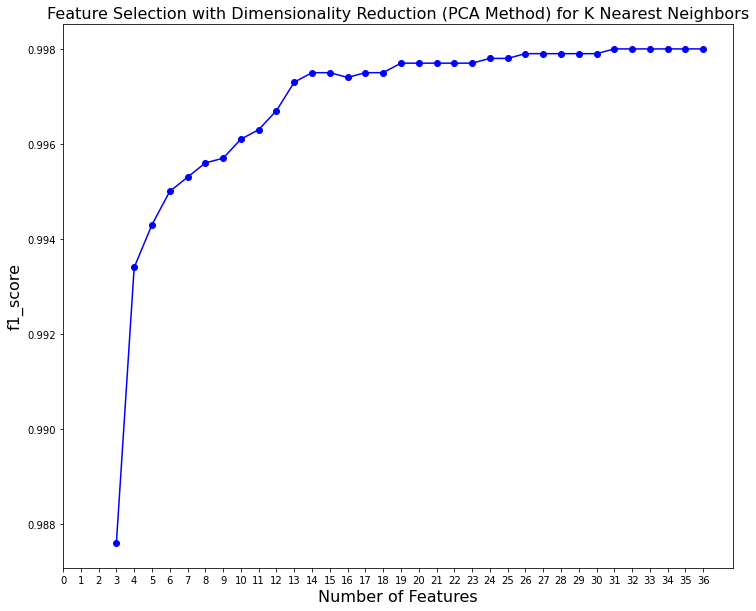

KNN Model - Maximum accuracy obtained using PCA is 0.998 for the number of components = 31
KNN Model - Maximum f1-score obtained using PCA is 0.998 for the number of components = 31


In [50]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

knn_adasyn = KNeighborsClassifier(n_neighbors=1)
acc_dict = {}
f1_dict = {}

for nf in tqdm(range(3,processed_adasyn_train_data_trX.shape[1]+1)):
    acc_val = []
    f1_val = []
    for train_index,test_index in skf.split(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY):
        X_train, X_test = processed_adasyn_train_data_trX.iloc[train_index], processed_adasyn_train_data_trX.iloc[test_index]
        y_train, y_test = processed_adasyn_train_data_trY.iloc[train_index], processed_adasyn_train_data_trY.iloc[test_index]
        pca = PCA(n_components=nf,random_state=rs)
        pca_train = pca.fit_transform(X_train)
        knn_adasyn.fit(pca_train,y_train)
        pca_test = pca.transform(X_test)
        pca_test_predict = knn_adasyn.predict(pca_test)
        acc_val.append(round(accuracy_score(y_test, pca_test_predict),4))
        f1_val.append(round(f1_score(y_test,pca_test_predict,labels=np.unique(pca_test_predict)),4))
    acc_dict[nf] = round(sum(acc_val)/len(acc_val),4)
    f1_dict[nf] = round(sum(f1_val)/len(f1_val),4)
plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(acc_dict.items())),color='blue',marker='o')
Title = "Feature Selection with Dimensionality Reduction (PCA Method) for K Nearest Neighbors"
plt.title(Title, fontsize=16)
plt.xticks(range(0,processed_adasyn_train_data_trX.shape[1]+1))
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.show();
plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(f1_dict.items())),color='blue',marker='o')
Title = "Feature Selection with Dimensionality Reduction (PCA Method) for K Nearest Neighbors"
plt.title(Title, fontsize=16)
plt.xticks(range(0,processed_adasyn_train_data_trX.shape[1]+1))
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("f1_score", fontsize=16)
plt.show();
acc_adasyn_knn = max(acc_dict.values())
acc_nfea_adasyn_knn=  max(acc_dict, key=acc_dict.get)
f1_adasyn_knn = max(f1_dict.values())
f1_nfea_adasyn_knn=  max(f1_dict, key=f1_dict.get)
print("KNN Model - Maximum accuracy obtained using PCA is {} for the number of components = {}".format(acc_adasyn_knn,acc_nfea_adasyn_knn))
print("KNN Model - Maximum f1-score obtained using PCA is {} for the number of components = {}".format(f1_adasyn_knn,f1_nfea_adasyn_knn))

In [51]:
def utility_select_feature(processed_adasyn_train_data_trX, processed_adasyn_train_data_trY, fsm, model):
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    acc_val = []
    f1_val = []
    for train_index,test_index in skf.split(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY):
        X_train, X_test = processed_adasyn_train_data_trX.iloc[train_index], processed_adasyn_train_data_trX.iloc[test_index]
        y_train, y_test = processed_adasyn_train_data_trY.iloc[train_index], processed_adasyn_train_data_trY.iloc[test_index]
        fs = fsm.fit(X_train, y_train)
        Xtrain_new = fs.transform(X_train)
        Xtest_new = fs.transform(X_test)
        model.fit(Xtrain_new, y_train)
        yPred = model.predict(Xtest_new)
        acc_val.append(round(accuracy_score(y_test, yPred),4))
        f1_val.append(round(f1_score(y_test,yPred,labels=np.unique(yPred)),4))
    acc = round(sum(acc_val)/len(acc_val),4)
    f1 = round(sum(f1_val)/len(f1_val),4)
    return acc,f1

100%|██████████| 34/34 [53:00<00:00, 93.54s/it] 


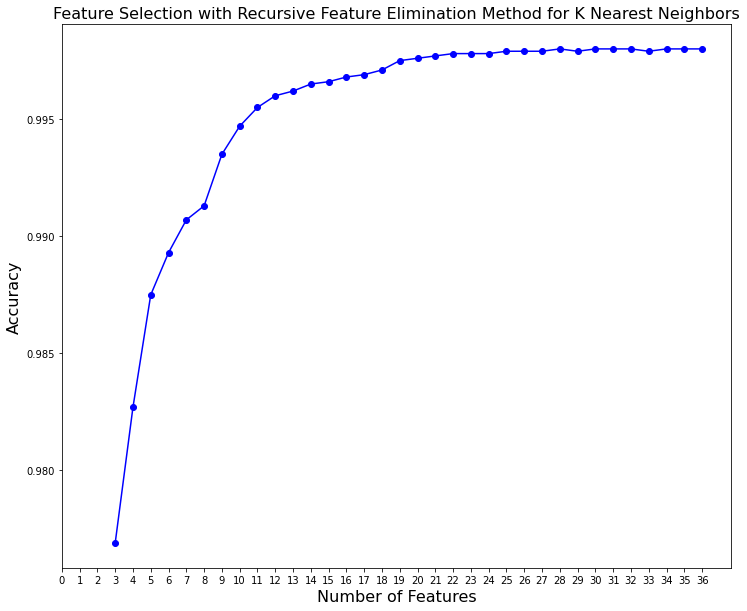

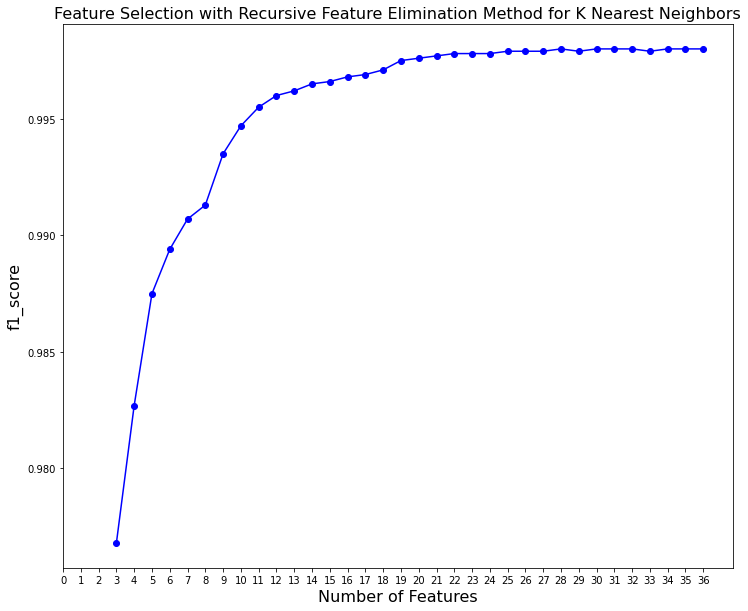

KNN Model - Maximum accuracy obtained using Recursive Feature Elimination Method 0.998 for the number of features = 28
KNN Model - Maximum f1-score obtained using Recursive Feature Elimination Method 0.998 for the number of features = 28


In [53]:
knn_adasyn = KNeighborsClassifier(n_neighbors=1)
dt_adasyn = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,random_state=0)
acc_dict = {}
f1_dict = {}
for nf in tqdm(range(3,processed_adasyn_train_data_trX.shape[1]+1)): 
    rfe = RFE(dt_adasyn, n_features_to_select=nf)
    acc,f1_val = utility_select_feature(processed_adasyn_train_data_trX, processed_adasyn_train_data_trY, rfe, knn_adasyn)
    acc_dict[nf] = acc
    f1_dict[nf] = f1_val

plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(acc_dict.items())),color='blue',marker='o')
Title = "Feature Selection with Recursive Feature Elimination Method for K Nearest Neighbors"
plt.title(Title, fontsize=16)
plt.xticks(range(0,processed_adasyn_train_data_trX.shape[1]+1))
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.show();

plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(f1_dict.items())),color='blue',marker='o')
Title = "Feature Selection with Recursive Feature Elimination Method for K Nearest Neighbors"
plt.title(Title, fontsize=16)
plt.xticks(range(0,processed_adasyn_train_data_trX.shape[1]+1))
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("f1_score", fontsize=16)
plt.show();

acc_adasyn_knn = max(acc_dict.values())
acc_nfea_adasyn_knn =  max(acc_dict, key=acc_dict.get)
f1_adasyn_knn = max(f1_dict.values())
f1_nfea_adasyn_knn =  max(f1_dict, key=f1_dict.get)
print("KNN Model - Maximum accuracy obtained using Recursive Feature Elimination Method {} for the number of features = {}".format(acc_adasyn_knn,acc_nfea_adasyn_knn))
print("KNN Model - Maximum f1-score obtained using Recursive Feature Elimination Method {} for the number of features = {}".format(f1_adasyn_knn,f1_nfea_adasyn_knn))

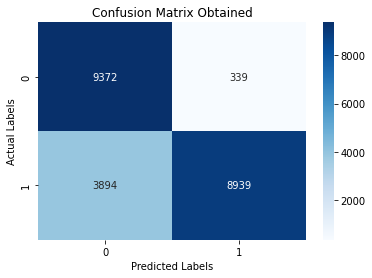

Accuarcy value obtained is  0.8122
F1-score obtained is  0.8086
Precision obtained is  0.9635
Recall obtained is  0.6966


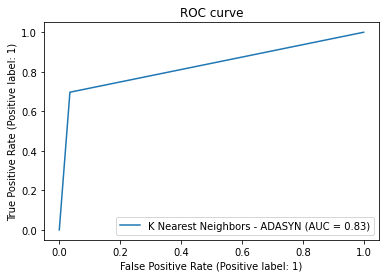

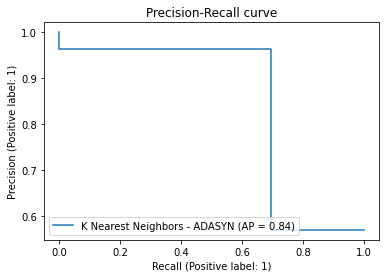

In [54]:
knn = KNeighborsClassifier(n_neighbors=1)
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=31,random_state=rs)
knn_pca_pipeline = Pipeline([('adasyn', adasyn), ('pca', pca), ('knn', knn)])
knn_pca_pipeline.fit(processed_train_data_trX,processed_train_data_trY)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(processed_test_data_X)
knn_list = ["K Nearest Neighbors - ADASYN after Hyperparameter Tuning and Feature Selection based on PCA"]
knn_list.extend(print_metrics(processed_test_data_Y, knn_pca_pipeline_yPred,"K Nearest Neighbors - ADASYN"))
knn_results_table.append(knn_list)

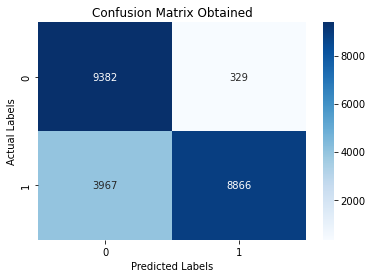

Accuarcy value obtained is  0.8094
F1-score obtained is  0.805
Precision obtained is  0.9642
Recall obtained is  0.6909


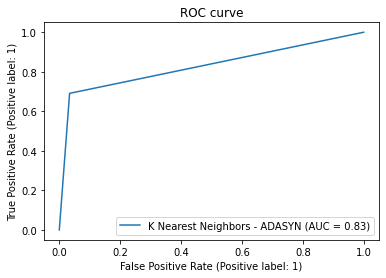

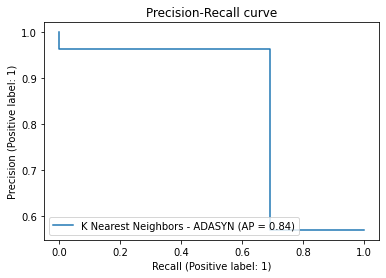

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,random_state=0)
adasyn = ADASYN(random_state=rs)
rfe = RFE(dt, n_features_to_select=28)
knn_rfe_pipeline = Pipeline([('adasyn', adasyn), ('rfe', rfe), ('knn', knn)])
knn_rfe_pipeline.fit(processed_train_data_trX,processed_train_data_trY)
knn_rfe_pipeline_yPred = knn_rfe_pipeline.predict(processed_test_data_X)
knn_list = ["K Nearest Neighbors - ADASYN after Hyperparameter Tuning and Feature Selection based on Recursive Feature Elimination"]
knn_list.extend(print_metrics(processed_test_data_Y, knn_rfe_pipeline_yPred,"K Nearest Neighbors - ADASYN"))
knn_results_table.append(knn_list)

In [56]:
knn_results_table

[['K Nearest Neighbors', 0.7876, 0.778, 0.9607, 0.6536],
 ['K Nearest Neighbors - SMOTE', 0.7929, 0.7848, 0.9607, 0.6634],
 ['K Nearest Neighbors - ADASYN', 0.8253, 0.8247, 0.9621, 0.7216],
 ['K Nearest Neighbors after Hyperparameter Tuning',
  0.8058,
  0.8005,
  0.9636,
  0.6846],
 ['K Nearest Neighbors - SMOTE after Hyperparameter Tuning',
  0.806,
  0.8008,
  0.9635,
  0.6851],
 ['K Nearest Neighbors - ADASYN after Hyperparameter Tuning',
  0.812,
  0.8083,
  0.9634,
  0.6962],
 ['K Nearest Neighbors - ADASYN after Hyperparameter Tuning and Feature Selection based on PCA',
  0.8122,
  0.8086,
  0.9635,
  0.6966],
 ['K Nearest Neighbors - ADASYN after Hyperparameter Tuning and Feature Selection based on Recursive Feature Elimination',
  0.8094,
  0.805,
  0.9642,
  0.6909]]

In [57]:
#Tabulating the obtained results and displaying the results by formatting
knn_df = pd.DataFrame(knn_results_table, columns = ["Classifier","accuracy","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(knn_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,Classifier,accuracy,f1-score,Precision,Recall
0,K Nearest Neighbors,0.7876,0.7780,0.9607,0.6536
1,K Nearest Neighbors - SMOTE,0.7929,0.7848,0.9607,0.6634
2,K Nearest Neighbors - ADASYN,0.8253,0.8247,0.9621,0.7216
3,K Nearest Neighbors after Hyperparameter Tuning,0.8058,0.8005,0.9636,0.6846
4,K Nearest Neighbors - SMOTE after Hyperparameter Tuning,0.8060,0.8008,0.9635,0.6851
5,K Nearest Neighbors - ADASYN after Hyperparameter Tuning,0.8120,0.8083,0.9634,0.6962
6,K Nearest Neighbors - ADASYN after Hyperparameter Tuning and Feature Selection based on PCA,0.8122,0.8086,0.9635,0.6966
7,K Nearest Neighbors - ADASYN after Hyperparameter Tuning and Feature Selection based on Recursive Feature Elimination,0.8094,0.8050,0.9642,0.6909


In [58]:
knn_df = knn_df.set_index("Classifier")

In [59]:
with pd.option_context('display.precision', 4):
    formatted_table=(knn_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,accuracy,f1-score,Precision,Recall
Classifier,,,,
K Nearest Neighbors,0.7876,0.7780,0.9607,0.6536
K Nearest Neighbors - SMOTE,0.7929,0.7848,0.9607,0.6634
K Nearest Neighbors - ADASYN,0.8253,0.8247,0.9621,0.7216
K Nearest Neighbors after Hyperparameter Tuning,0.8058,0.8005,0.9636,0.6846
K Nearest Neighbors - SMOTE after Hyperparameter Tuning,0.8060,0.8008,0.9635,0.6851
K Nearest Neighbors - ADASYN after Hyperparameter Tuning,0.8120,0.8083,0.9634,0.6962
K Nearest Neighbors - ADASYN after Hyperparameter Tuning and Feature Selection based on PCA,0.8122,0.8086,0.9635,0.6966
K Nearest Neighbors - ADASYN after Hyperparameter Tuning and Feature Selection based on Recursive Feature Elimination,0.8094,0.8050,0.9642,0.6909
